Ref: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [1]:
%matplotlib inline


## 检查下 matplotlib 是否正常输出
import matplotlib

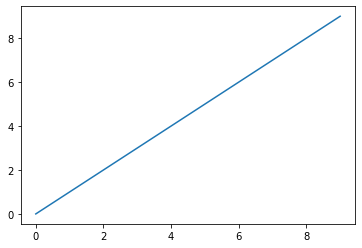

In [2]:
import matplotlib.pyplot as plt

plt.plot(range(10), range(10))
plt.show()

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  # 保留 10000 个最常见的单词

In [5]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
# 单词索引
max([max(sequence) for sequence in train_data])

9999

In [7]:
# 可以将索引解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[9]]
)

In [8]:
decoded_review

"? this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its ? though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy ? then pop a bowl of popcorn invite some friends over and have some fun br br i agree with other comments that the sound is very bad dialog is next to impossible to follow much of the time and the soundtrack is kind of just there"

## 准备数据

In [9]:
## 数据向量化预处理
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    print(len(sequences))
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

25000
25000


In [10]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [11]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

## 构建网络

2 个中间层，使用 relu 激活函数。输出层使用 sigmoid 函数，生成一个概率值。

> 上面采用原文说法。在我理解中，这个模型似乎应该算为 1 个输入层、1 个中间层和 1 个输出层。

In [12]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# 编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
# 自定义配置优化器
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # 学习率
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# 自定义损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
# 设置验证集
# 留出 10000 作为验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

使用 512 样本组成小批量，训练模型 20 轮次（对 `x_train` 和 `y_train` 所有数据迭代 20 次）。10, 000 样本用于每一次监控损失和精度。

In [26]:
# 训练模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.0120 - acc: 0.9967 - val_loss: 0.7473 - val_acc: 0.8648
Epoch 2/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.7967 - val_acc: 0.8642
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.0096 - acc: 0.9977 - val_loss: 0.8309 - val_acc: 0.8650
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.8488 - val_acc: 0.8631
Epoch 5/20
15000/15000 [==============================] - 1s 71us/step - loss: 8.9641e-04 - acc: 0.9999 - val_loss: 0.8891 - val_acc: 0.8615
Epoch 6/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.0049 - acc: 0.9989 - val_loss: 0.9201 - val_acc: 0.8629
Epoch 7/20
15000/15000 [==============================] - 1s 71us/step - loss: 5.3418e-04 - acc: 1.0000 - val_loss: 0.9379 -

history 对象有 history 成员，是一个字典，包含训练过程的数据。

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 绘制损失

In [28]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

## 批次序列
epochs = range(1, len(loss_values) + 1)

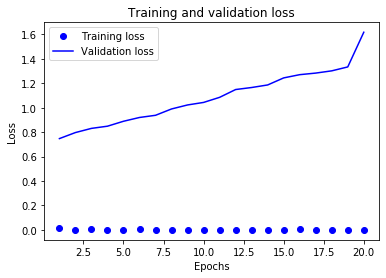

In [29]:
#import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 这里明显模型过拟合了，验证损失越打越大

## 绘制训练精度和验证精度

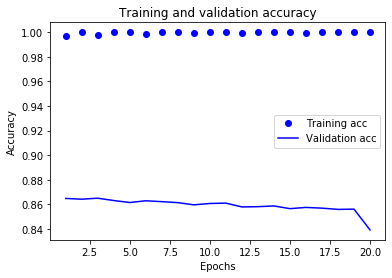

In [30]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> 数据不一样？结果跟书上差别挺大的
> Update:
> 我并没有更改什么，结果趋势居然又跟书上的一致了。。。。神奇。

## 从头开始训练一个模型

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

## 预测

In [31]:
model.predict(x_test)

array([[8.9406967e-06],
       [1.0000000e+00],
       [3.7857533e-01],
       ...,
       [2.5629997e-06],
       [6.5863132e-06],
       [1.1118174e-02]], dtype=float32)